In [15]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import pandas as pd
import numpy as np

#train_data_source = './exercise_data/human_dna_train_small.csv'
train_data_source = './exercise_data/human_dna_train_split_5_95.csv'
val_data_source = './exercise_data/human_dna_validation_split.csv'
test_data_source = './exercise_data/human_dna_test_split.csv'

train_df = pd.read_csv(train_data_source, header=0)
test_df = pd.read_csv(test_data_source, header=0)

train_seq = train_df['sequences']
train_label = train_df['labels']
test_seq = test_df['sequences']
test_label = test_df['labels']

# Preprocess
tk = text.Tokenizer(char_level=True)
tk.fit_on_texts(train_seq)

train_seq_tok = tk.texts_to_sequences(train_seq)
test_seq_tok = tk.texts_to_sequences(test_seq)

train_seq = np.array(train_seq)
train_seq_tok = np.array(train_seq_tok)
train_label = np.array(train_label)
test_seq = np.array(test_seq)
test_seq_tok = np.array(test_seq_tok)
test_label = np.array(test_label)

print('train_seq shape:', train_seq.shape)
print('test_seq shape:', test_seq.shape)

train_seq shape: (29420,)
test_seq shape: (33333,)


In [16]:
train_label[train_label<0]=0
test_label[test_label<0]=0

In [17]:
train_label

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
train_seq_tok = train_seq_tok - np.ones(shape=train_seq_tok.shape)
test_seq_tok = test_seq_tok - np.ones(shape=test_seq_tok.shape)

In [19]:
train_seq_tok

array([[0., 3., 1., ..., 1., 0., 1.],
       [0., 2., 2., ..., 0., 0., 0.],
       [1., 2., 2., ..., 1., 2., 0.],
       ...,
       [2., 0., 0., ..., 1., 1., 2.],
       [1., 3., 1., ..., 2., 1., 1.],
       [2., 0., 0., ..., 1., 1., 1.]])

In [20]:
train_seq_tok_split = np.hsplit(train_seq_tok, 2)

In [21]:
train_seq_tok.shape

(29420, 398)

In [22]:
train_seq_tok_split[0].shape

(29420, 199)

In [23]:
train_seq_tok[0]

array([0., 3., 1., 1., 2., 1., 2., 2., 0., 0., 1., 1., 2., 3., 1., 1., 3.,
       0., 0., 2., 0., 2., 2., 1., 0., 2., 2., 0., 3., 1., 0., 2., 2., 1.,
       3., 2., 1., 0., 1., 2., 2., 2., 1., 1., 3., 0., 1., 0., 0., 2., 3.,
       1., 1., 1., 0., 0., 3., 0., 0., 2., 1., 2., 3., 1., 0., 2., 2., 0.,
       2., 0., 0., 2., 1., 3., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
       3., 1., 2., 0., 1., 0., 0., 3., 3., 1., 2., 1., 0., 3., 1., 2., 0.,
       0., 1., 2., 0., 2., 0., 2., 2., 3., 1., 2., 0., 1., 1., 1., 1., 3.,
       1., 3., 1., 0., 2., 1., 2., 2., 2., 2., 0., 2., 1., 3., 0., 2., 1.,
       1., 2., 2., 2., 1., 1., 2., 3., 1., 2., 3., 1., 1., 1., 1., 1., 3.,
       0., 2., 2., 3., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 3.,
       1., 2., 3., 0., 3., 0., 0., 0., 3., 0., 3., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 3., 3., 1., 1., 1., 2., 2., 1., 0., 1., 3.,
       3., 0., 3., 3., 3., 0., 3., 1., 1., 3., 1., 1., 0., 2., 2., 2., 3.,
       1., 0., 0., 3., 3.

In [24]:
test_seq_tok_split = np.hsplit(test_seq_tok, 2)

In [25]:
train_seq_tok_split[0][0]

array([0., 3., 1., 1., 2., 1., 2., 2., 0., 0., 1., 1., 2., 3., 1., 1., 3.,
       0., 0., 2., 0., 2., 2., 1., 0., 2., 2., 0., 3., 1., 0., 2., 2., 1.,
       3., 2., 1., 0., 1., 2., 2., 2., 1., 1., 3., 0., 1., 0., 0., 2., 3.,
       1., 1., 1., 0., 0., 3., 0., 0., 2., 1., 2., 3., 1., 0., 2., 2., 0.,
       2., 0., 0., 2., 1., 3., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
       3., 1., 2., 0., 1., 0., 0., 3., 3., 1., 2., 1., 0., 3., 1., 2., 0.,
       0., 1., 2., 0., 2., 0., 2., 2., 3., 1., 2., 0., 1., 1., 1., 1., 3.,
       1., 3., 1., 0., 2., 1., 2., 2., 2., 2., 0., 2., 1., 3., 0., 2., 1.,
       1., 2., 2., 2., 1., 1., 2., 3., 1., 2., 3., 1., 1., 1., 1., 1., 3.,
       0., 2., 2., 3., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 3.,
       1., 2., 3., 0., 3., 0., 0., 0., 3., 0., 3., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 3., 3., 1., 1., 1., 2.])

Train...
Train on 29420 samples, validate on 33333 samples
Epoch 1/200
29420/29420 [==============================] - 3s 102us/step - loss: 0.2063 - acc: 0.9500 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.0702 - val_acc: 0.9969 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/200
29420/29420 [==============================] - 3s 87us/step - loss: 0.1930 - acc: 0.9500 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.0656 - val_acc: 0.9969 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/200
29420/29420 [==============================] - 3s 87us/step - loss: 0.1807 - acc: 0.9500 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.0422 - val_acc: 0.9969 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/200
29420/29420 [==============================] - 3s 85us/step - loss: 0.

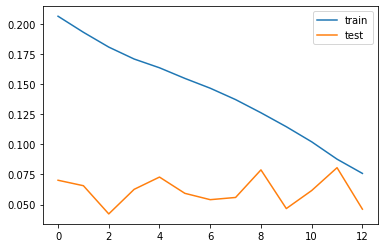

In [42]:
from keras.layers import Dropout, concatenate, Input
import keras as K
import keras.backend as K2
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

def recall_m(y_true, y_pred):
    true_positives = K2.sum(K2.round(K2.clip(y_true * y_pred, 0, 1)))
    possible_positives = K2.sum(K2.round(K2.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K2.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K2.sum(K2.round(K2.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K2.sum(K2.round(K2.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K2.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K2.epsilon()))

batch_size = 64
epochs = 200
learning_rate = 0.0001

# First Half
first_half = Input(shape=(199,))
x = Dense(150, activation='relu')(first_half)
# x = Dropout(0.2)(x)
x = Dense(100, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(75, activation='relu')(x)
# x = Dropout(0.2)(x)
out_first = Dense(50, activation='relu')(x)
# out_first = Dropout(0.2)(x)

second_half = Input(shape=(199,))
x = Dense(100, activation='relu')(second_half)
# x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x)
# x = Dropout(0.2)(x)
out_second = Dense(25, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(50, activation='relu', input_shape=(75,))(x)
# out_second = Dropout(0.2)(x)

concatenated = concatenate([out_first, out_second])
x = Dense(75, activation='relu')(concatenated)
# model.add(Dropout(0.2))
x = Dense(50, activation='relu')(x)
# model.add(Dropout(0.2))
x = Dense(20, activation='relu')(x)
# model.add(Dropout(0.2))
out_final = Dense(1, activation='sigmoid')(x)

model = K.Model([first_half, second_half], out_final)

# try using different optimizers and different optimizer configs
opt = K.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc', recall_m, precision_m, f1_m])

print('Train...')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(train_seq_tok_split, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_seq_tok_split, test_label), callbacks=[es])
score, acc, recall, precision, f1 = model.evaluate(test_seq_tok_split, test_label, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('Test recall:', recall)
print('Test precision:', precision)
print('Test F1:', f1)


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [43]:
def get_model(learning_rate):
    # First Half
    first_half = Input(shape=(199,))
    x = Dense(150, activation='relu')(first_half)
    x = Dense(100, activation='relu')(x)
    x = Dense(75, activation='relu')(x)
    out_first = Dense(50, activation='relu')(x)

    second_half = Input(shape=(199,))
    x = Dense(100, activation='relu')(second_half)
    x = Dense(50, activation='relu')(x)
    out_second = Dense(25, activation='relu')(x)

    concatenated = concatenate([out_first, out_second])
    x = Dense(75, activation='relu')(concatenated)
    x = Dense(50, activation='relu')(x)
    x = Dense(20, activation='relu')(x)
    out_final = Dense(1, activation='sigmoid')(x)

    model = K.Model([first_half, second_half], out_final)

    # Hyperparameters: learning_rate, beta_1, beta_2, epsilon
    opt = K.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc', f1_m])

    return model

epochs = 100
batch_size = 64
learning_rate = 0.001

model = get_model(learning_rate=learning_rate)
history = model.fit(train_seq_tok_split, train_label, 
                    batch_size=batch_size, epochs=epochs, 
                    validation_data=(test_seq_tok_split, test_label))
score, acc, f1 = model.evaluate(test_seq_tok_split, test_label, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('Test F1:', f1)

Train on 29420 samples, validate on 33333 samples
Epoch 1/100
29420/29420 [==============================] - 3s 103us/step - loss: 0.2024 - acc: 0.9493 - f1_m: 1.8116e-04 - val_loss: 0.0668 - val_acc: 0.9969 - val_f1_m: 0.0000e+00
Epoch 2/100
29420/29420 [==============================] - 3s 91us/step - loss: 0.1836 - acc: 0.9500 - f1_m: 0.0000e+00 - val_loss: 0.0373 - val_acc: 0.9969 - val_f1_m: 0.0000e+00
Epoch 3/100
29420/29420 [==============================] - 3s 89us/step - loss: 0.1761 - acc: 0.9500 - f1_m: 0.0000e+00 - val_loss: 0.1038 - val_acc: 0.9969 - val_f1_m: 0.0000e+00
Epoch 4/100
29420/29420 [==============================] - 3s 88us/step - loss: 0.1658 - acc: 0.9501 - f1_m: 0.0026 - val_loss: 0.0806 - val_acc: 0.9969 - val_f1_m: 0.0000e+00
Epoch 5/100
29420/29420 [==============================] - 3s 91us/step - loss: 0.1571 - acc: 0.9513 - f1_m: 0.0638 - val_loss: 0.0854 - val_acc: 0.9863 - val_f1_m: 0.0048
Epoch 6/100
29420/29420 [==============================] - 3s

Epoch 48/100
29420/29420 [==============================] - 3s 87us/step - loss: 0.0120 - acc: 0.9957 - f1_m: 0.9063 - val_loss: 0.0889 - val_acc: 0.9806 - val_f1_m: 0.0203
Epoch 49/100
29420/29420 [==============================] - 3s 87us/step - loss: 0.0089 - acc: 0.9970 - f1_m: 0.9303 - val_loss: 0.0779 - val_acc: 0.9801 - val_f1_m: 0.0150
Epoch 50/100
29420/29420 [==============================] - 3s 89us/step - loss: 0.0094 - acc: 0.9968 - f1_m: 0.9250 - val_loss: 0.0926 - val_acc: 0.9795 - val_f1_m: 0.0116
Epoch 51/100
29420/29420 [==============================] - 3s 88us/step - loss: 0.0080 - acc: 0.9972 - f1_m: 0.9391 - val_loss: 0.1169 - val_acc: 0.9808 - val_f1_m: 0.0126
Epoch 52/100
29420/29420 [==============================] - 3s 89us/step - loss: 0.0079 - acc: 0.9969 - f1_m: 0.9230 - val_loss: 0.1107 - val_acc: 0.9812 - val_f1_m: 0.0084
Epoch 53/100
29420/29420 [==============================] - 3s 90us/step - loss: 0.0075 - acc: 0.9976 - f1_m: 0.9416 - val_loss: 0.1502

Epoch 95/100
29420/29420 [==============================] - 3s 90us/step - loss: 4.9419e-09 - acc: 1.0000 - f1_m: 0.9652 - val_loss: 0.2868 - val_acc: 0.9860 - val_f1_m: 0.0147
Epoch 96/100
29420/29420 [==============================] - 3s 88us/step - loss: 4.1110e-09 - acc: 1.0000 - f1_m: 0.9717 - val_loss: 0.2897 - val_acc: 0.9859 - val_f1_m: 0.0147
Epoch 97/100
29420/29420 [==============================] - 3s 88us/step - loss: 3.3832e-09 - acc: 1.0000 - f1_m: 0.9674 - val_loss: 0.2923 - val_acc: 0.9859 - val_f1_m: 0.0147
Epoch 98/100
29420/29420 [==============================] - 3s 89us/step - loss: 2.7923e-09 - acc: 1.0000 - f1_m: 0.9674 - val_loss: 0.2950 - val_acc: 0.9858 - val_f1_m: 0.0147
Epoch 99/100
29420/29420 [==============================] - 3s 88us/step - loss: 2.3347e-09 - acc: 1.0000 - f1_m: 0.9565 - val_loss: 0.2973 - val_acc: 0.9857 - val_f1_m: 0.0134
Epoch 100/100
33333/33333 [==============================] - 1s 21us/step
Test score: 0.2996316272663492
Test accur